In [2]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('spend.csv',parse_dates=True,index_col=0)
sp=pd.read_csv('earn.csv',parse_dates=True,index_col=0)

In [6]:
df=df.join(sp)

In [7]:
df

,Spending,Money
Date,,
1995-01-01,4851.2,3492.4
1995-02-01,4850.8,3489.9
1995-03-01,4885.4,3491.1
1995-04-01,4890.2,3499.2
1995-05-01,4933.1,3524.2
...,...,...
2015-08-01,12394.0,12096.8
2015-09-01,12392.8,12153.8
2015-10-01,12416.1,12187.7


In [8]:
df.shape

(252, 2)

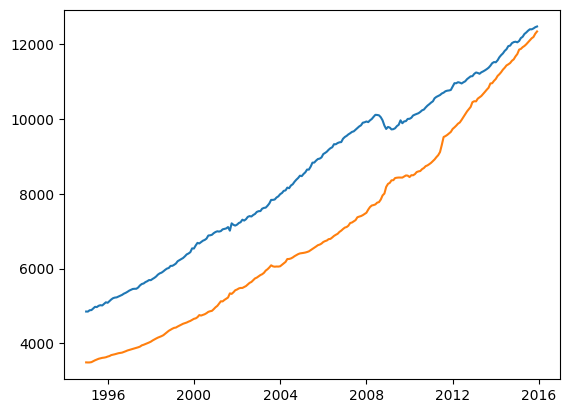

In [10]:
plt.plot(df[['Spending','Money']])

In [14]:
ad_fuller_result_1=adfuller(df['Spending'])
print(ad_fuller_result_1[1])
ad_fuller_result_2=adfuller(df['Money'])
print(ad_fuller_result_2[1])

0.9693009944428312
1.0


In [17]:
ad_fuller_result_1=adfuller(df['Spending'].diff()[1:])
print(ad_fuller_result_1[1])
ad_fuller_result_2=adfuller(df['Money'].diff()[1:])
print(ad_fuller_result_2[1])

2.0410272592129706e-10
0.26198379785112447


In [18]:
df_diff=df.diff()
df_diff=df_diff.dropna()

In [19]:
ad_fuller_result_1=adfuller(df_diff['Spending'].diff()[1:])
print(ad_fuller_result_1[1])
ad_fuller_result_2=adfuller(df_diff['Money'].diff()[1:])
print(ad_fuller_result_2[1])

2.6878999679871547e-14
4.760674931295455e-10


In [22]:
granger1=grangercausalitytests(df[['Spending','Money']],7)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5856  , p=0.4448  , df_denom=248, df_num=1
ssr based chi2 test:   chi2=0.5927  , p=0.4414  , df=1
likelihood ratio test: chi2=0.5920  , p=0.4416  , df=1
parameter F test:         F=0.5856  , p=0.4448  , df_denom=248, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6461  , p=0.5250  , df_denom=245, df_num=2
ssr based chi2 test:   chi2=1.3186  , p=0.5172  , df=2
likelihood ratio test: chi2=1.3151  , p=0.5181  , df=2
parameter F test:         F=0.6461  , p=0.5250  , df_denom=245, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6772  , p=0.1725  , df_denom=242, df_num=3
ssr based chi2 test:   chi2=5.1771  , p=0.1593  , df=3
likelihood ratio test: chi2=5.1240  , p=0.1629  , df=3
parameter F test:         F=1.6772  , p=0.1725  , df_denom=242, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5428  , p=0.1905  

In [24]:
granger2=grangercausalitytests(df[['Money','Spending']],10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6439  , p=0.4231  , df_denom=248, df_num=1
ssr based chi2 test:   chi2=0.6517  , p=0.4195  , df=1
likelihood ratio test: chi2=0.6509  , p=0.4198  , df=1
parameter F test:         F=0.6439  , p=0.4231  , df_denom=248, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.0760  , p=0.0479  , df_denom=245, df_num=2
ssr based chi2 test:   chi2=6.2776  , p=0.0433  , df=2
likelihood ratio test: chi2=6.2001  , p=0.0450  , df=2
parameter F test:         F=3.0760  , p=0.0479  , df_denom=245, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.2731  , p=0.0218  , df_denom=242, df_num=3
ssr based chi2 test:   chi2=10.1034 , p=0.0177  , df=3
likelihood ratio test: chi2=9.9038  , p=0.0194  , df=3
parameter F test:         F=3.2731  , p=0.0218  , df_denom=242, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.6203  , p=0.0357  

In [25]:
train=df[:-12]
test=df[-12:]

In [26]:
train.shape

(240, 2)

In [27]:
test.shape

(12, 2)

In [28]:
#we fit differenced/stationary training data into model/here we have to difference twice
train_diff=train.diff()
train_diff=train_diff.dropna()

In [29]:
#difference it again
train_diff=train_diff.diff()
train_diff=train_diff.dropna()

In [30]:
model=VAR(train_diff)

In [31]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        14.89       14.92   2.915e+06       14.90
1        14.31       14.40   1.638e+06       14.35
2        14.09       14.24   1.312e+06       14.15
3        13.97      14.19*   1.171e+06       14.06
4        13.95       14.23   1.145e+06       14.06
5        13.91       14.25   1.099e+06      14.05*
6        13.92       14.32   1.107e+06       14.08
7        13.91       14.37   1.098e+06       14.10
8       13.85*       14.38  1.039e+06*       14.07
9        13.87       14.46   1.055e+06       14.11
10       13.90       14.55   1.088e+06       14.16
11       13.93       14.65   1.129e+06       14.22
12       13.96       14.74   1.161e+06       14.28
13       13.96       14.80   1.158e+06       14.30
14       13.99       14.89   1.197e+06       14.36
15       13.98       14.94   1.179e+06       14.37
16       13.98       15.01   1.

In [32]:
#when fitting model using varmax fit original data as varmax automatically makes it stationary
var_model=VARMAX(train,order=(8,0),enforce_stationarity=True)
fitted_model=var_model.fit(disp=False)
print(fitted_model.summary())

                             Statespace Model Results                            
Dep. Variable:     ['Spending', 'Money']   No. Observations:                  240
Model:                            VAR(8)   Log Likelihood             -413315.987
                             + intercept   AIC                         826705.975
Date:                   Wed, 06 Dec 2023   BIC                         826834.759
Time:                           09:04:41   HQIC                        826757.865
Sample:                       01-01-1995                                         
                            - 12-01-2014                                         
Covariance Type:                     opg                                         
Ljung-Box (L1) (Q):         237.17, 239.18   Jarque-Bera (JB):           8.33, 5.41
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.02, 0.07
Heteroskedasticity (H):         0.28, 0.24   Skew:                       0.24, 0.11
Prob(H) (t

In [33]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train),end=len(train) + n_forecast-1)

predictions=predict.predicted_mean

In [35]:
predictions.columns=['Spending','money']

In [36]:
predictions

,Spending,money
2015-01-01,12531.006472,11894.781913
2015-02-01,12185.361710,11612.236892
2015-03-01,12487.700696,11810.838588
2015-04-01,12399.579841,11679.346361
2015-05-01,12379.500942,11638.304924
2015-06-01,12296.211365,11555.280264
2015-07-01,12227.893934,11497.146404
2015-08-01,12182.993044,11460.869265
2015-09-01,12104.936614,11409.520532
2015-10-01,12110.341524,11413.172870


In [37]:
test_vs_pred=pd.concat([test,predictions],axis=1)

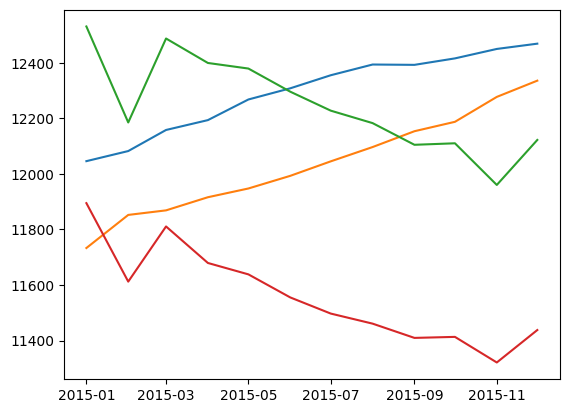

In [38]:
plt.plot(test_vs_pred)

In [40]:
from sklearn.metrics import mean_squared_error
import math
from statistics import mean

rmse_spend=math.sqrt(mean_squared_error(predictions['Spending'],test['Spending']))
print('Mean value of spending is : {}. Root Mean Squared Error is :{}'.format(mean(test['Spending']),rmse_spend))

rmse_money=math.sqrt(mean_squared_error(predictions['money'],test['Money']))
print('Mean value of money is : {}. Root Mean Squared Error is :{}'.format(mean(test['Money']),rmse_money))

Mean value of spending is : 12294.533333333333. Root Mean Squared Error is :289.60665905389874
Mean value of money is : 12034.008333333333. Root Mean Squared Error is :578.1056391704385
